
Total count for output 10 are: {'000000': 406, '000001': 31, '010000': 106, '010001': 17, '010010': 25, '010011': 27, '010100': 80, '010101': 22, '010110': 36, '010111': 12, '011000': 13, '011001': 48, '011010': 15, '011011': 136, '011100': 12, '011101': 41, '011110': 14, '011111': 81, '000010': 73, '100000': 137, '100001': 12, '100010': 29, '100011': 17, '100100': 134, '100101': 23, '100110': 79, '100111': 35, '101000': 15, '101001': 44, '101010': 18, '101011': 121, '101100': 20, '101101': 81, '101110': 37, '101111': 565, '000011': 31, '110000': 74, '110001': 10, '110010': 24, '110011': 7, '110100': 145, '110101': 11, '110110': 33, '110111': 14, '111000': 16, '111001': 24, '111010': 17, '111011': 35, '111100': 19, '111101': 42, '111110': 21, '111111': 103, '000100': 87, '000101': 7, '000110': 43, '000111': 20, '001000': 41, '001001': 98, '001010': 35, '001011': 186, '001100': 14, '001101': 35, '001110': 20, '001111': 226}

Total count for 00 output are: {'000000': 422, '000001': 31, 

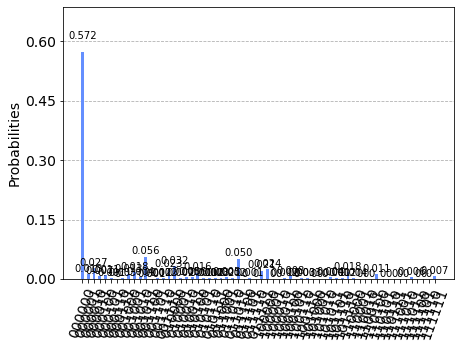

In [32]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit.compiler import transpile
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller
from qiskit.tools.visualization import plot_histogram
# Loading your IBM Quantum account(s)
provider = IBMQ.get_provider(hub ='ibm-q-education', group='ibm-quantum-1', project='quantum-hackatho')
backend = provider.get_backend('ibm_perth')

# normal_rippleCarryAdder
qc = QuantumCircuit(6)
qc.cx(3,1)
qc.cx(1,0)
qc.cx(2,4)
qc.ccx(0,3,1)
qc.cx(2,1)
qc.ccx(1,4,2)
qc.cx(2,5)
qc.ccx(1,4,2)
qc.cx(2,1)
qc.cx(4,1)
qc.ccx(0,4,1)
qc.cx(1,0)
qc.cx(0,3)
qc.measure_all()
qc.draw(output='mpl')

job = execute(qc, backend)
result = job.result()
counts_qc = result.get_counts(qc)
print("\nTotal count for output 10 are:",counts_qc)
plot_histogram(counts_qc)

#transpiled normal_rippleCarryAdder
qc_transpile = transpile(qc, backend)
qc_transpile.draw(output='mpl')

job = execute(qc_transpile, backend)
result = job.result()
counts_qctr = result.get_counts(qc_transpile)
print("\nTotal count for 00 output are:",counts_qctr)
plot_histogram(counts_qctr)

# #ccx in rippleCarryAdder is replaced into ch-cz-ch gates
our_qc = QuantumCircuit(6)
our_qc.cx(3,1)
our_qc.cx(1,0)
our_qc.cx(2,4)
our_qc.ch(0,1)
our_qc.cz(3,1)
our_qc.ch(0,1)
our_qc.cx(2,1)
our_qc.ch(1,2)
our_qc.cz(4,2)
our_qc.ch(1,2)
our_qc.cx(2,5)
our_qc.ch(1,2)
our_qc.cz(4,2)
our_qc.ch(1,2)
our_qc.cx(2,1)
our_qc.cx(4,1)
our_qc.ch(0,1)
our_qc.cz(4,1)
our_qc.ch(0,1)
our_qc.cx(1,0)
our_qc.cx(0,3)
our_qc.measure_all()
our_qc.draw(output='mpl')

job = execute(our_qc, backend)
result = job.result()
counts_our_qc = result.get_counts(our_qc)
print("\nTotal count for 00 and 11 are:",counts_our_qc)
plot_histogram(counts_our_qc)

# transpiled full_adder which has ch-cz-ch
our_qc_transpile=transpile(our_qc, backend, optimization_level = 3)
our_qc_transpile.draw(output='mpl')

job = execute(our_qc_transpile, backend)
result = job.result()
counts_our_qctr = result.get_counts(our_qc_transpile)
print("\nTotal count for 00 output are:",counts_our_qctr)
plot_histogram(counts_our_qctr)

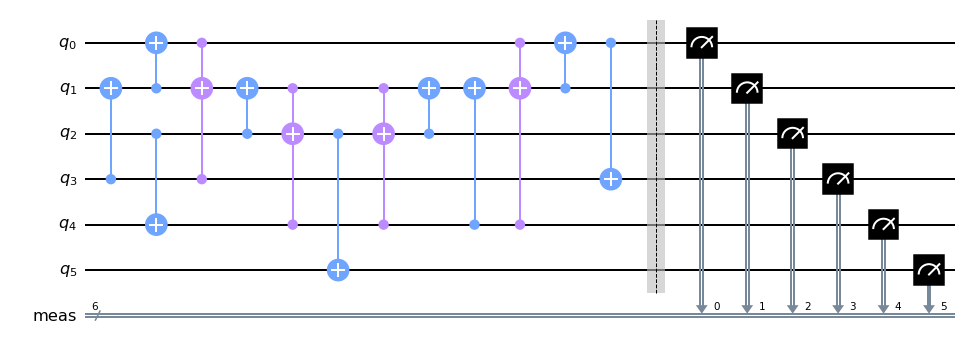

In [12]:
qc = QuantumCircuit(6)
qc.cx(3,1)
qc.cx(1,0)
qc.cx(2,4)
qc.ccx(0,3,1)
qc.cx(2,1)
qc.ccx(1,4,2)
qc.cx(2,5)
qc.ccx(1,4,2)
qc.cx(2,1)
qc.cx(4,1)
qc.ccx(0,4,1)
qc.cx(1,0)
qc.cx(0,3)
qc.measure_all()
qc.draw(output='mpl')


In [13]:
provider = IBMQ.get_provider(hub ='ibm-q-education', group='ibm-quantum-1', project='quantum-hackatho')
backend = provider.get_backend('ibm_perth')


Total count for 00 and 11 are: {'000000': 835, '000001': 58, '010000': 79, '010001': 26, '010010': 26, '010011': 34, '010100': 124, '010101': 55, '010110': 41, '010111': 78, '011000': 9, '011001': 57, '011010': 13, '011011': 228, '011100': 39, '011101': 61, '011110': 25, '011111': 121, '000010': 129, '100000': 64, '100001': 8, '100010': 17, '100011': 16, '100100': 44, '100101': 29, '100110': 40, '100111': 31, '101000': 6, '101001': 19, '101010': 7, '101011': 27, '101100': 23, '101101': 38, '101110': 34, '101111': 103, '000011': 46, '110000': 12, '110001': 9, '110010': 13, '110011': 14, '110100': 33, '110101': 14, '110110': 30, '110111': 13, '111000': 6, '111001': 15, '111010': 15, '111011': 30, '111100': 21, '111101': 15, '111110': 32, '111111': 24, '000100': 127, '000101': 66, '000110': 62, '000111': 52, '001000': 82, '001001': 98, '001010': 37, '001011': 207, '001100': 57, '001101': 69, '001110': 29, '001111': 228}


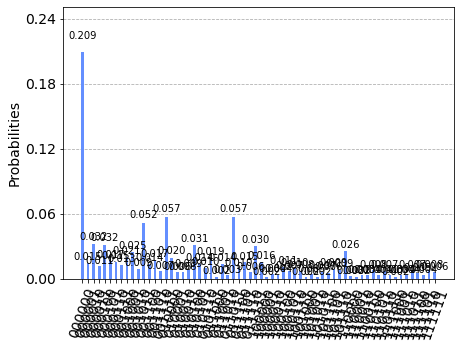

In [20]:
job = execute(qc, backend)
result = job.result()
counts = result.get_counts(qc)
print("\nTotal count for 00 and 11 are:",counts)
plot_histogram(counts)

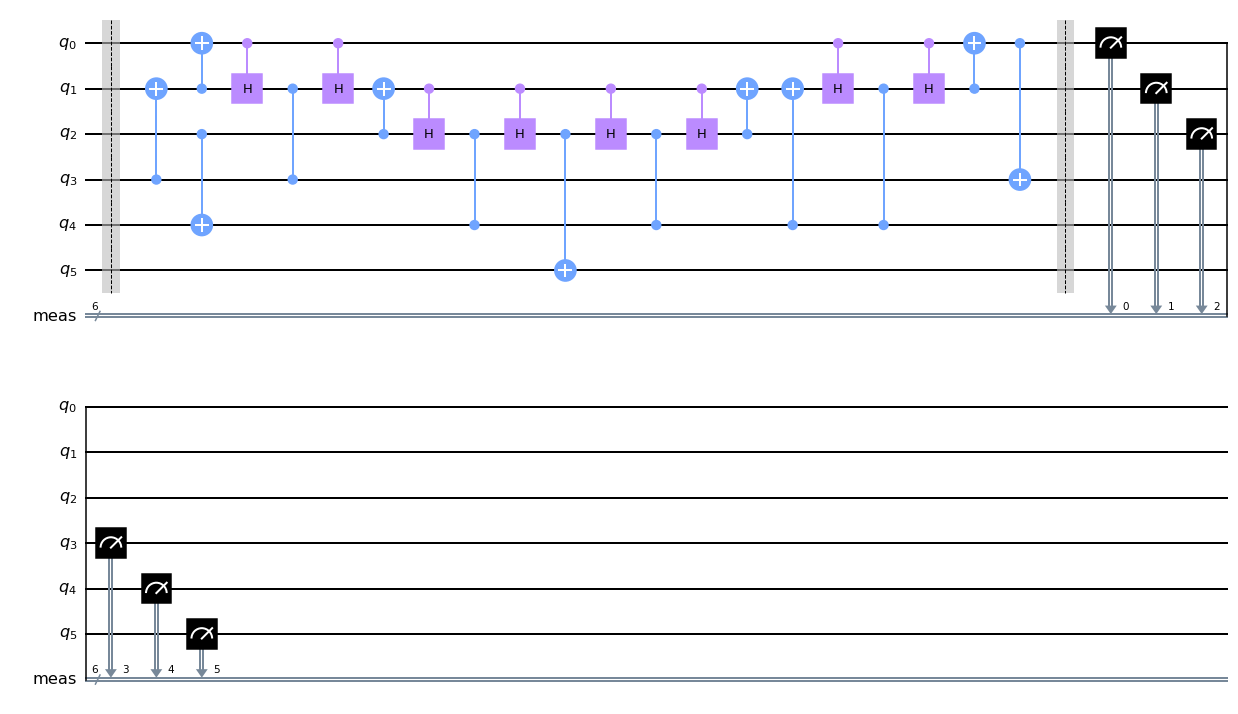

In [15]:
our_qc = QuantumCircuit(6)

our_qc.barrier()
our_qc.cx(3,1)
our_qc.cx(1,0)
our_qc.cx(2,4)
our_qc.ch(0,1)
our_qc.cz(3,1)
our_qc.ch(0,1)
our_qc.cx(2,1)
our_qc.ch(1,2)
our_qc.cz(4,2)
our_qc.ch(1,2)
our_qc.cx(2,5)
our_qc.ch(1,2)
our_qc.cz(4,2)
our_qc.ch(1,2)
our_qc.cx(2,1)
our_qc.cx(4,1)
our_qc.ch(0,1)
our_qc.cz(4,1)
our_qc.ch(0,1)
our_qc.cx(1,0)
our_qc.cx(0,3)
our_qc.measure_all()
our_qc.draw(output='mpl')


Total count for 00 and 11 are: {'000000': 1556, '000001': 35, '010000': 88, '010001': 21, '010010': 24, '010011': 21, '010100': 21, '010101': 11, '010110': 11, '010111': 9, '011000': 36, '011001': 58, '011010': 10, '011011': 233, '011100': 5, '011101': 23, '011110': 6, '011111': 130, '000010': 166, '100000': 77, '100001': 1, '100010': 18, '100011': 6, '100100': 91, '100101': 8, '100110': 31, '100111': 9, '101000': 13, '101001': 33, '101010': 5, '101011': 29, '101100': 8, '101101': 50, '101110': 5, '101111': 70, '000011': 27, '110000': 42, '110001': 4, '110010': 33, '110011': 7, '110100': 29, '110101': 2, '110110': 16, '110111': 3, '111000': 9, '111001': 18, '111010': 3, '111011': 25, '111100': 6, '111101': 9, '111110': 2, '111111': 11, '000100': 71, '000101': 9, '000110': 11, '000111': 20, '001000': 56, '001001': 306, '001010': 10, '001011': 231, '001100': 12, '001101': 46, '001110': 3, '001111': 61}


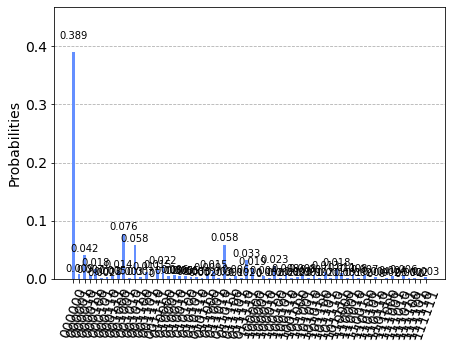

In [19]:
job = execute(our_qc, backend)
result = job.result()
our_counts = result.get_counts(our_qc)
print("\nTotal count for 00 and 11 are:",our_counts)
plot_histogram(our_counts)

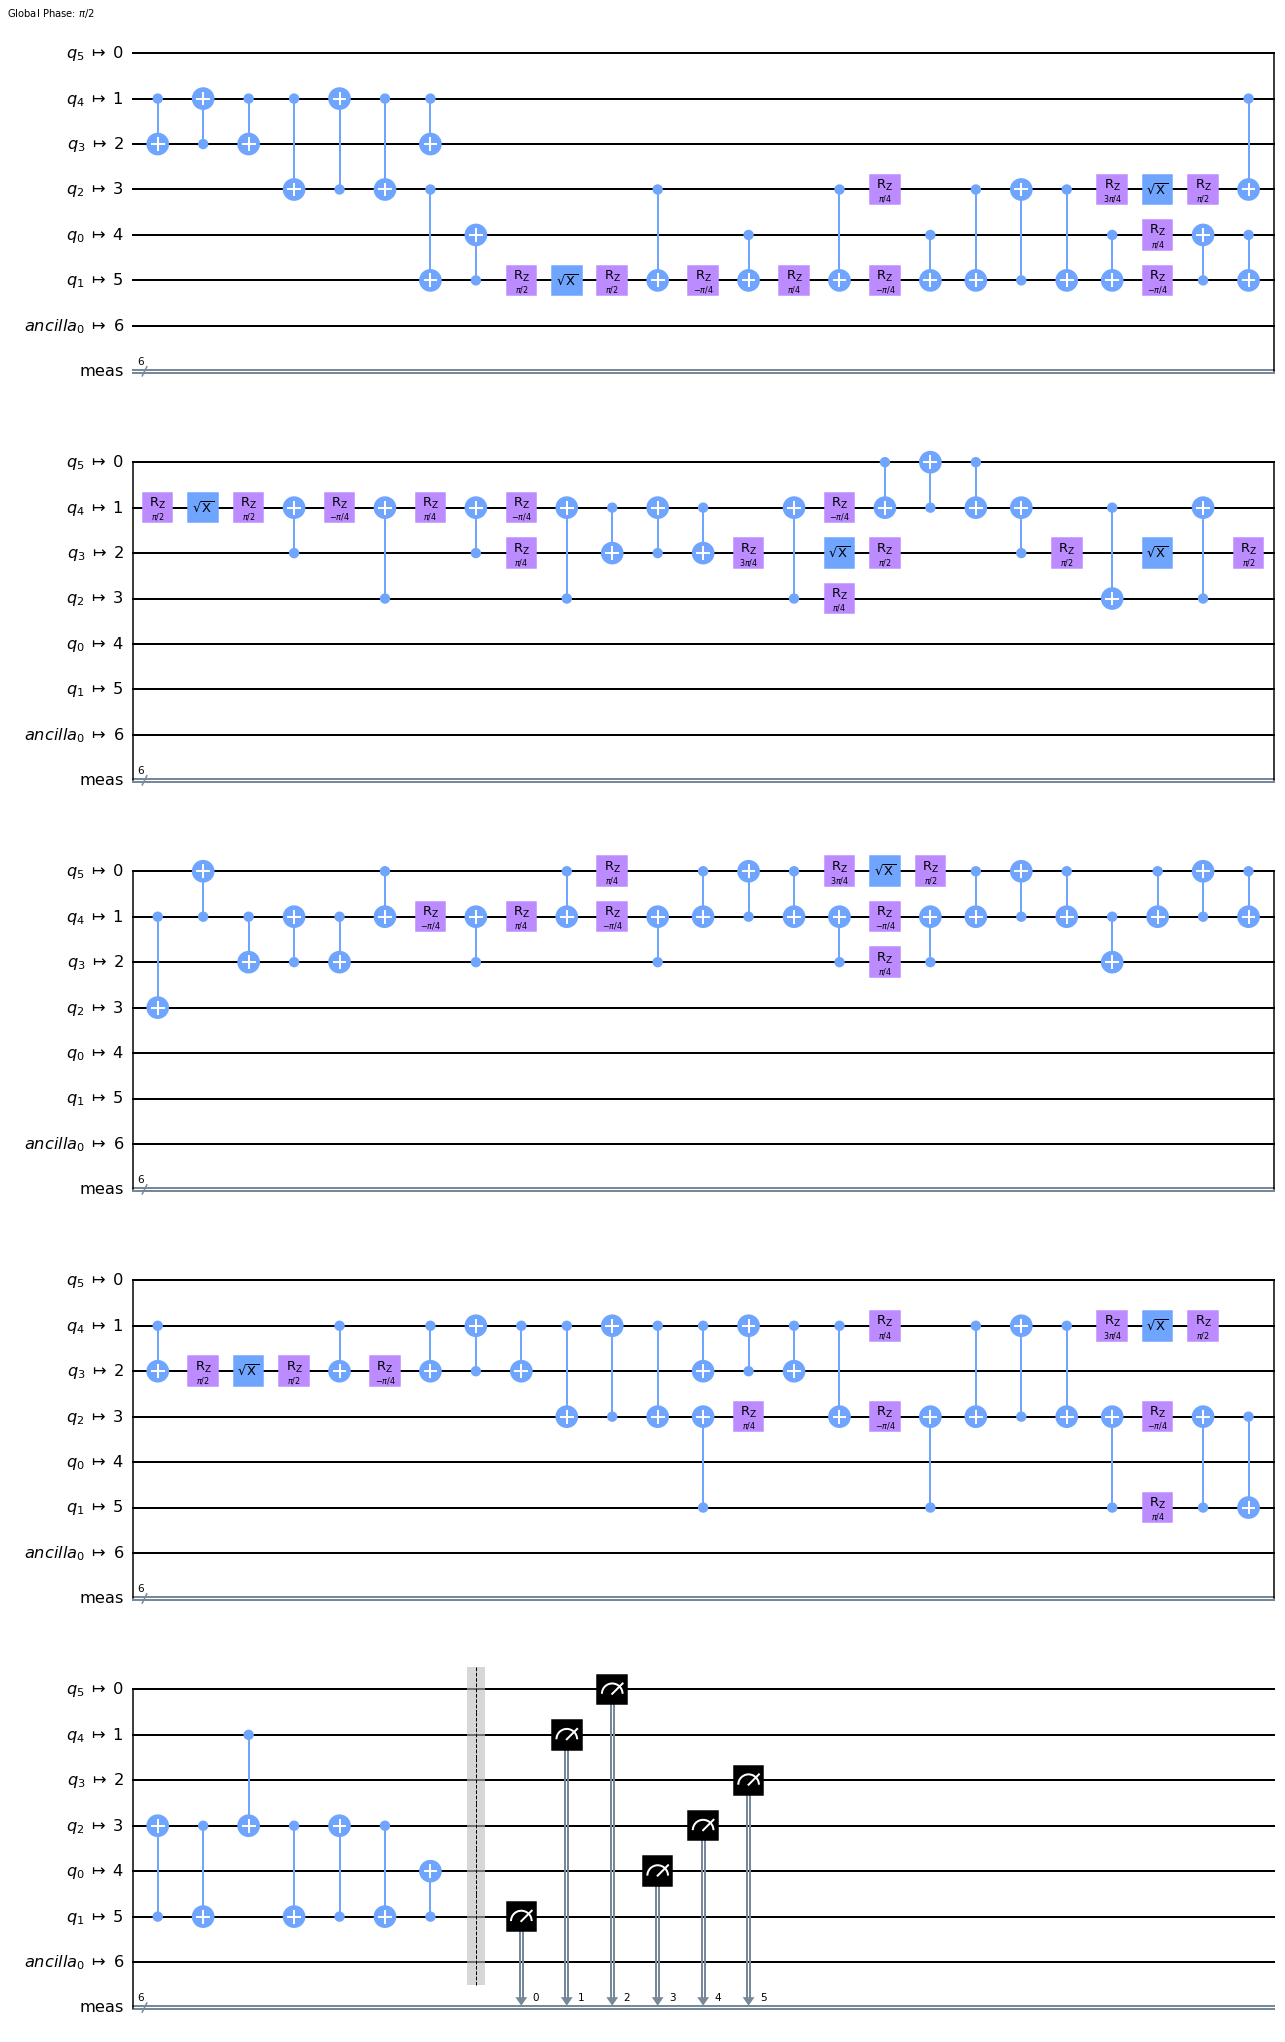

In [22]:
re_transpile=transpile(qc, backend)
re_transpile.draw(output='mpl')


Total count for 00 output are: {'000000': 1060, '000001': 66, '010000': 250, '010001': 45, '010010': 66, '010011': 24, '010100': 68, '010101': 21, '010110': 18, '010111': 13, '011000': 38, '011001': 76, '011010': 36, '011011': 285, '011100': 8, '011101': 17, '011110': 6, '011111': 76, '000010': 79, '100000': 88, '100001': 9, '100010': 8, '100011': 13, '100100': 158, '100101': 7, '100110': 16, '100111': 9, '101000': 16, '101001': 13, '101010': 8, '101011': 66, '101100': 12, '101101': 15, '101110': 6, '101111': 58, '000011': 47, '110000': 38, '110001': 11, '110010': 25, '110011': 9, '110100': 41, '110101': 3, '110110': 13, '110111': 8, '111000': 14, '111001': 13, '111010': 10, '111011': 43, '111100': 9, '111101': 12, '111110': 9, '111111': 34, '000100': 55, '000101': 8, '000110': 18, '000111': 8, '001000': 103, '001001': 158, '001010': 38, '001011': 365, '001100': 10, '001101': 19, '001110': 8, '001111': 117}


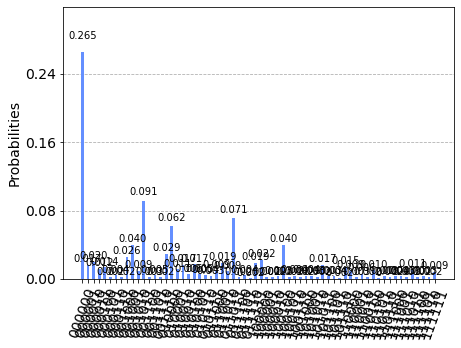

In [23]:
job = execute(re_transpile, backend)
result = job.result()
re_counts = result.get_counts(re_transpile)
print("\nTotal count for 00 output are:",re_counts)
plot_histogram(re_counts)

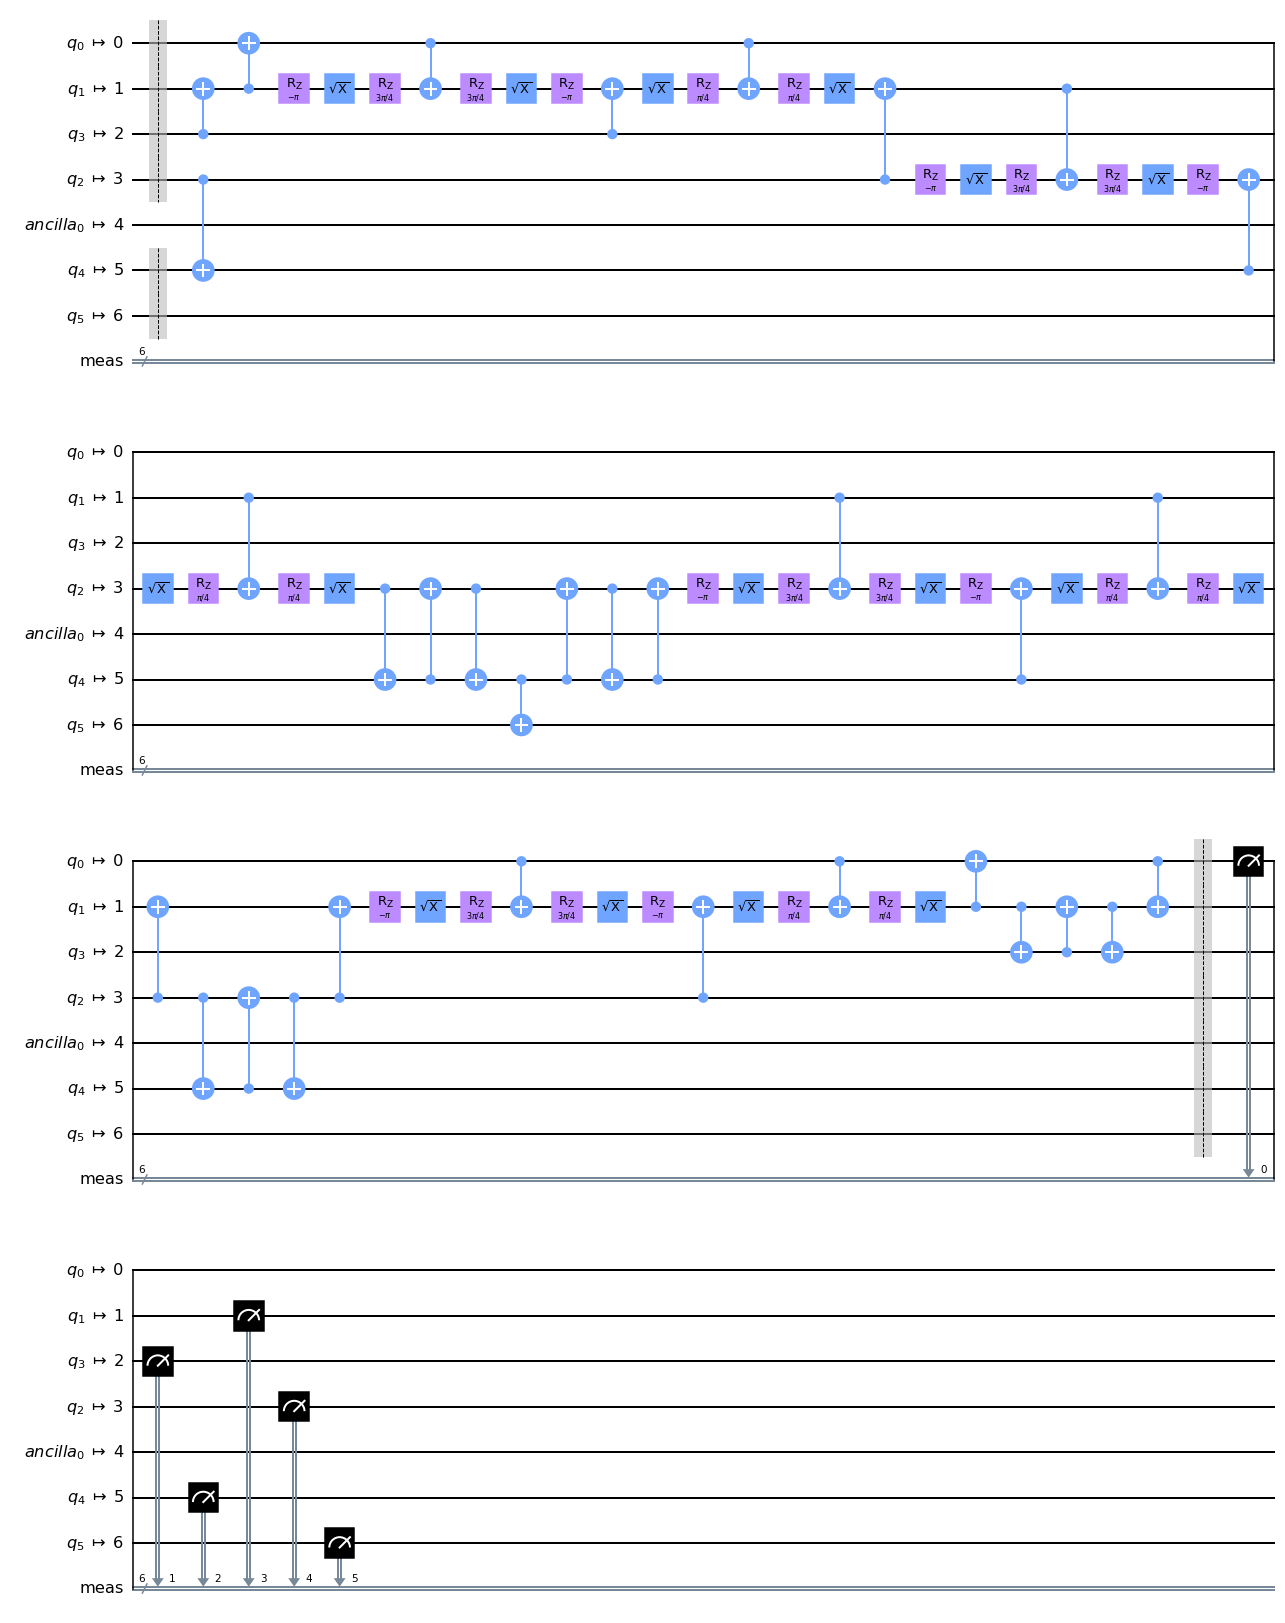

In [25]:
our_qc_transpile=transpile(our_qc, backend, optimization_level = 3)
our_qc_transpile.draw(output='mpl')


Total count for 00 output are: {'000000': 2360, '000001': 35, '010000': 162, '010001': 6, '010010': 13, '010011': 9, '010100': 43, '010101': 2, '010110': 3, '010111': 2, '011000': 5, '011001': 18, '011010': 22, '011011': 227, '011100': 2, '011101': 5, '011110': 7, '011111': 60, '000010': 87, '100000': 38, '100001': 1, '100010': 3, '100011': 1, '100100': 25, '100110': 5, '100111': 1, '101000': 4, '101001': 2, '101010': 3, '101011': 6, '101100': 1, '101101': 8, '101110': 8, '101111': 70, '000011': 23, '110000': 10, '110001': 1, '110010': 4, '110011': 2, '110100': 29, '110101': 2, '110110': 8, '111000': 1, '111010': 4, '111011': 7, '111100': 2, '111101': 2, '111110': 3, '111111': 23, '000100': 59, '000101': 3, '000110': 4, '000111': 2, '001000': 49, '001001': 106, '001010': 54, '001011': 230, '001100': 7, '001101': 10, '001110': 7, '001111': 104}


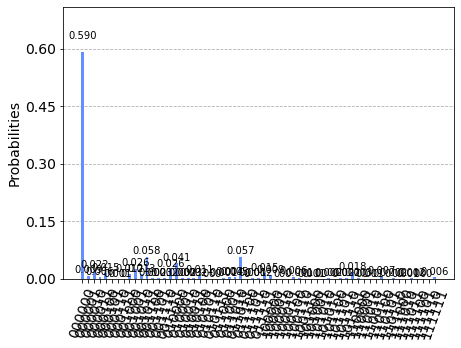

In [26]:
job = execute(our_qc_transpile, backend)
result = job.result()
counts_our_qctr = result.get_counts(our_qc_transpile)
print("\nTotal count for 00 output are:",counts_our_qctr)
plot_histogram(counts_our_qctr)